In [413]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [418]:
a = 0
b = 10
c = 0
d = 10

e = 0.01

xlin = ylin = 10

xstep = (b - a) / xlin
ystep = (d - c) / ylin

def function(x, y):
    return 2 * x + y

u = np.zeros((ylin, xlin))
x = np.linspace(a, b, xlin)
y = np.linspace(c, d, ylin)
f = function(x, y)

u[:, 0] = x + y[0]
u[:, -1] = x + y[-1]
u[0, :] = x[0] + y
u[-1, :] = x[-1] + y

In [419]:
init_e = 1
while init_e > e:
    z = np.copy(u)
    for i in range(1, ylin-1):
        for j in range(1, xlin-1):
            z[i, j] = .25 * (u[i+1, j] + u[i-1, j] + u[i, j-1] + u[i, j+1] - xstep ** 2 * f[i])
    init_e = np.amax(np.absolute(z - u))
    u = np.copy(z)

In [420]:
zeid_u = np.copy(u)
init_e = 1
while init_e > e:
    z = np.copy(zeid_u)
    for i in range(1, ylin-1):
        for j in range(1, xlin-1):
            z[i, j] = .25 * (z[i+1, j] + zeid_u[i-1, j] + z[i, j-1] + zeid_u[i, j+1] - xstep ** 2 * f[i])
    init_e = np.amax(np.absolute(z - zeid_u))
    zeid_u = np.copy(z)

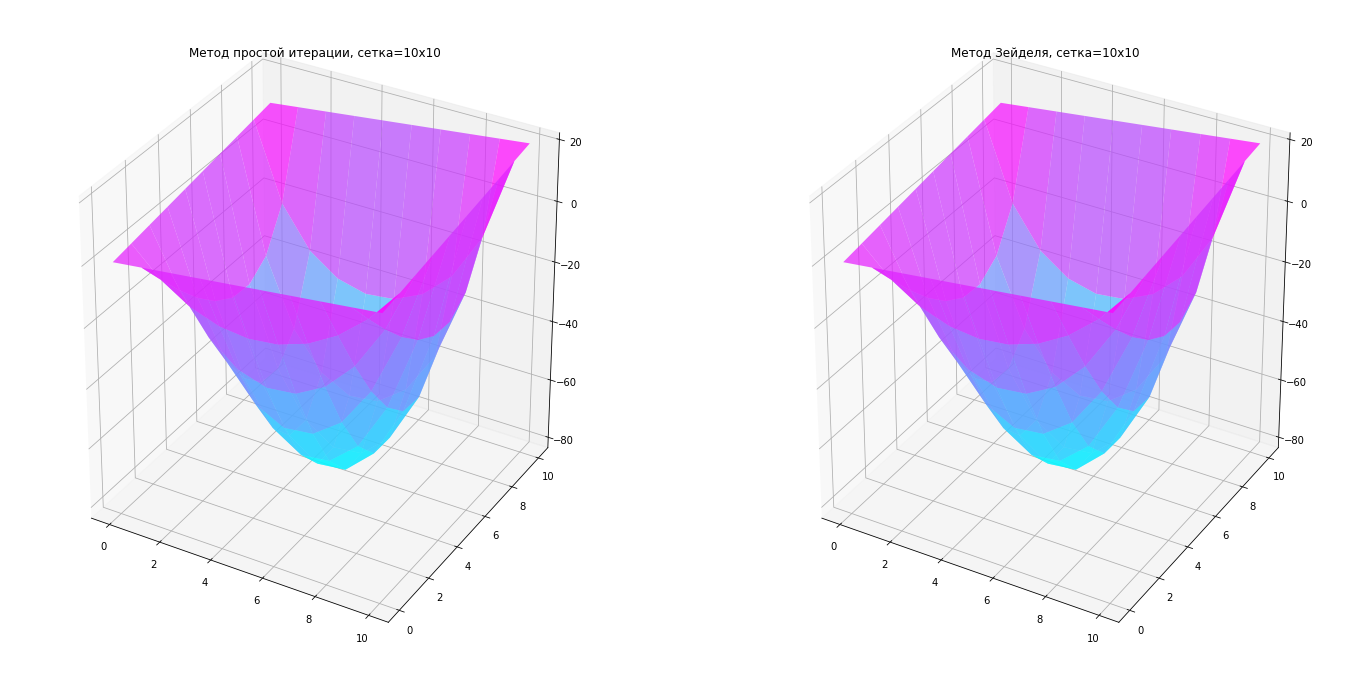

In [421]:
xx, yy = np.meshgrid(x, y)

c = cm.cool
l = 0.5
alpha = 0.7

fig = plt.figure(figsize=3*plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1, projection='3d', title=f'Метод простой итерации, сетка={xlin}x{ylin}')
surf = ax.plot_surface(xx, yy, u,
                       cmap=c,
                       linewidth=l,
                       antialiased=True,
                       alpha=alpha)

ax = fig.add_subplot(1, 2, 2, projection='3d', title=f'Метод Зейделя, сетка={xlin}x{ylin}')
surf = ax.plot_surface(xx, yy, zeid_u, 
                       cmap=c,
                       linewidth=l, 
                       antialiased=True,
                       alpha=alpha)